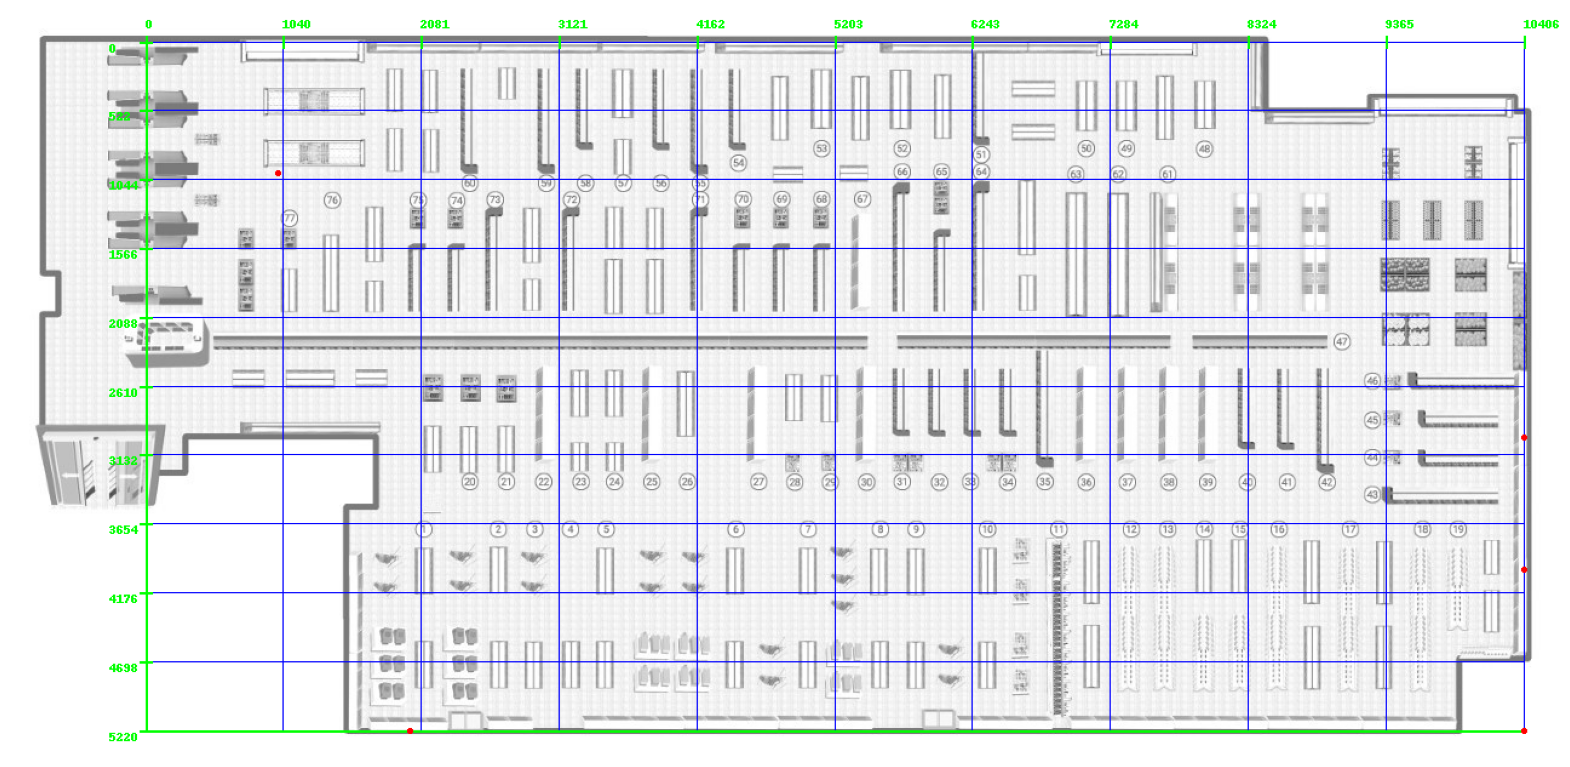

In [1]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import pandas as pd

# Lataa kuva
img = Image.open('./kauppa.jpg')
width, height = img.size

# Aseta koordinaatiston parametrit
x_offset = 112  # x-akselin offset
y_offset = 27   # y-akselin offset
x_max = 1250    # x-akselin maksimi
y_max = 595     # y-akselin maksimi
x_scale = (x_max - x_offset) / 10406  # x-akselin skaalauskerroin
y_scale = (y_max - y_offset) / 5220  # y-akselin skaalauskerroin

# Luo ImageDraw-objekti
d = ImageDraw.Draw(img)

# Piirrä apuviivat
for i in range(11):
    x = x_offset + i * (x_max - x_offset) / 10
    y = y_offset + i * (y_max - y_offset) / 10
    d.line([(x, y_offset), (x, y_max)], fill=(0, 0, 255), width=1)
    d.line([(x_offset, y), (x_max, y)], fill=(0, 0, 255), width=1)

# Piirrä koordinaattiviivat
d.line([(x_offset, y_offset), (x_offset, y_max)], fill=(0, 255, 0), width=2)   # x-akseli
d.line([(x_offset, y_max), (x_max, y_max)], fill=(0, 255, 0), width=2)   # y-akseli

# Piirrä koordinaattiviivojen merkinnät
for i in range(11):
    x_tick = x_offset + (i * (x_max - x_offset) / 10)
    y_tick = y_offset + (i * (y_max - y_offset) / 10)
    x_label = str(int(i * 10406 / 10))   # x-akselin merkinnän arvo
    y_label = str(int(i * 5220 / 10))    # y-akselin merkinnän arvo
    d.text((x_tick, y_offset - 20), x_label, font=None, fill=(0, 255, 0))
    d.text((x_offset - 30, y_tick), y_label, font=None, fill=(0, 255, 0))
    d.line([(x_tick, y_offset - 5), (x_tick, y_offset + 5)], fill=(0, 255, 0), width=2)
    d.line([(x_offset - 5, y_tick), (x_offset + 5, y_tick)], fill=(0, 255, 0), width=2)

# Piirrä pisteet
df = pd.DataFrame({
    'x': [1000, 2000, 10406, 10406, 10406],
    'y': [1000, 5220, 3000, 4000, 5220]
})

for index, row in df.iterrows():
    x, y = row.x, row.y
    scaled_x = x_offset + x * x_scale
    scaled_y = y_offset + y * y_scale
    d.ellipse([scaled_x-2, scaled_y-2, scaled_x+2, scaled_y+2], fill=(255, 0, 0, 255))

# Näytä kuva
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.axis('off')
plt.show()
